In [50]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Shewy con represor
(modelo con señal tipo seno o con señal tipo escalón)

En este modelo intenté hacer darle forma al crecimiento de la densidad de citocromos a manera que se regule a partir de una proteasa especifica(en codigo: "O", normal: ompT), que a su vez es regulada por un represor(codigo: "R") que se produce junto con los citocromos (its a little bit confusing m8ty, if u have no clue chat with me).

In [51]:
#First,we define the value of h,the corresponding range in x and the constants
#If you need more information about the parameters of our model please visit our Wiki. 

h=0.200 #step value

a=90.000   #important, adjusted value 
bXR=300.000 #No va 
kXR=3000.000 #typical value 
gXR=0.060 #real, checked 
dXRa=0.1998 #real, important not checked 
bX=300.000 #typical value 
nX=1.000 #Assumed ...why?
kx=1409.148 #not important 
kXRa=3000.000 #esto no va 
gXRa=0.0231 #not important not checked  


aX = 0.004691138 #real, basal checked, important
aR = 0.004691138 #basal Repressor production ---------non validated
gCY= 0.00071666667 #important checked, strange value 
gaCY = 0.01171666667 # Cytochrome protein (Active) degradation coupling ------ non validated
kc = 0.000001406334639 #real, important 
kR = 0.000001406334639 #repressor coupling rate ------ non validated
gO = 0.033 #ompT degradarion rate ------- non validated
gR = 0.033 #Repressor degration rate -------- non validated



n_points = int((4000.0+h)/h)
t = zeros(n_points)
XR = zeros(n_points) 
CY = zeros(n_points)  
A = zeros(n_points)
R = zeros(n_points)
O = zeros(n_points) 
XRa = zeros(n_points) 
#A no cambia

In [52]:
#we define all the functions 
def func_XRa_prime(t,XRa,CY,XR,A):
    return kc*XR*A-(gXRa*XRa)-(dXRa*XRa)

def func_XR_prime(t,XRa,CY,XR,A):
    return a-(kc*A*kXR)-(gXR*XR)+(dXRa*XRa)

#modified
def func_CY_prime(t,XRa,CY,XR,A,O):
    return aX+(kc*A*XR)-(gCY*CY)-(gaCY*CY*O)
#new
def func_R_prime(t,XR,A,R):
    return aR+(kc*A*XR)-(gR*R)
#new
def func_O_prime(t,O,R):
    return aX-(kR*R)-(gO*O)

In [61]:

#First we initialize the arrays
t[0] = 0.0
XRa[0] = 0.0
XR[0] = 0.0
CY[0] = 0.0
A[0] = 0.0
R[0] = 0.0 #new
O[0] = 0.0 #new
#then we determine the input function
for i in range(400):
    A[i]=0.0
for i in range(401,n_points):
    A[i]=5000*sin(t[i]/100)+5000 #input senosoidal
    #A[i]=10000 #input funcion escalon
    
#And finally we do 4th order Runge Kutta. 
for i in range(1,n_points):
    
    k1_XRa = func_XRa_prime(t[i-1],XRa[i-1],CY[i-1],XR[i-1],A[i-1])
    k1_CY = func_CY_prime(t[i-1],XRa[i-1],CY[i-1],XR[i-1],A[i-1], O[i-1])
    k1_XR = func_XR_prime(t[i-1],XRa[i-1],CY[i-1],XR[i-1],A[i-1])
    k1_R = func_R_prime(t[i-1],XR[i-1],A[i-1],R[i-1])
    k1_O = func_O_prime(t[i-1],O[i-1],R[i-1])
    
    
    #first step
    t1 = t[i-1] + (h/2.0)
    XRa1 = XRa[i-1] + (h/2.0) * k1_XRa
    CY1 = CY[i-1] + (h/2.0) * k1_CY
    XR1 = XR[i-1] + (h/2.0) * k1_XR
    R1 = R[i-1] + (h/2.0) * k1_R
    O1 = O[i-1] + (h/2.0) * k1_O

    k2_XRa = func_XRa_prime(t1,XRa1,CY1,XR1,A[i-1])
    k2_CY = func_CY_prime(t1,XRa1,CY1,XR1,A[i-1], O1)
    k2_XR = func_XR_prime(t1,XRa1,CY1,XR1,A[i-1])
    k2_R = func_R_prime(t1, XR1, A[i-1], R1)
    k2_O = func_O_prime(t1, O1, R1)
    
    
    #second step
    t2 = t[i-1] + (h/2.0)
    XRa2 = XRa[i-1] + (h/2.0) * k2_XRa
    CY2 = CY[i-1] + (h/2.0) * k2_CY
    XR2 = XR[i-1] + (h/2.0) * k2_XR
    R2 = R[i-1] + (h/2.0) * k2_R
    O2 = O[i-1] + (h/2.0) * k2_O
     
    k3_XRa = func_XRa_prime(t2,XRa2,CY2,XR2,A[i-1])
    k3_CY = func_CY_prime(t2,XRa2,CY2,XR2,A[i-1],O2)
    k3_XR = func_XR_prime(t2,XRa2,CY2,XR2,A[i-1])
    k3_R = func_R_prime(t2, XR2, A[i-1], R2)
    k3_O = func_O_prime(t2, O2, R2)
    
    
    #third step
    t3 = t[i-1] + h
    XRa3 = XRa[i-1] + (h/2.0) * k3_XRa
    CY3 = CY[i-1] + (h/2.0) * k3_CY
    XR3 = XR[i-1] + (h/2.0) * k3_XR
    R3 = R[i-1] + (h/2.0) * k3_R
    O3 = O[i-1] + (h/2.0) * k3_O
    
    k4_XRa = func_XRa_prime(t3,XRa3,CY3,XR3,A[i-1])
    k4_CY = func_CY_prime(t3,XRa3,CY3,XR3,A[i-1],O3)
    k4_XR = func_XR_prime(t3,XRa3,CY3,XR3,A[i-1])
    k4_R = func_R_prime(t3, XR3, A[i-1], R3)
    k4_O = func_O_prime(t3, O3, R3)
    
    
     #fourth step
    average_k_XRa = (1.0/6.0)*(k1_XRa + 2.0*k2_XRa + 2.0*k3_XRa + k4_XRa)
    average_k_CY = (1.0/6.0)*(k1_CY + 2.0*k2_CY + 2.0*k3_CY + k4_CY)
    average_k_XR = (1.0/6.0)*(k1_XR + 2.0*k2_XR + 2.0*k3_XR + k4_XR)
    average_k_R = (1.0/6.0)*(k1_R + 2.0*k2_R + 2.0*k3_R + k4_R)
    average_k_O = (1.0/6.0)*(k1_O + 2.0*k2_O + 2.0*k3_O + k4_O)
    
    

    t[i] = t[i-1] + h
    XRa[i] = XRa[i-1] + h * average_k_XRa
    CY[i] = CY[i-1] + h * average_k_CY
    XR[i] = XR[i-1] + h * average_k_XR
    R[i] = R[i-1] + h * average_k_R
    O[i] = O[i-1] + h * average_k_O
    #"""
    if (i < 400):
        A[i]=0.0
    if (401<i<n_points):
        A[i]=5000*sin(t[i]/100)+5000
    #"""


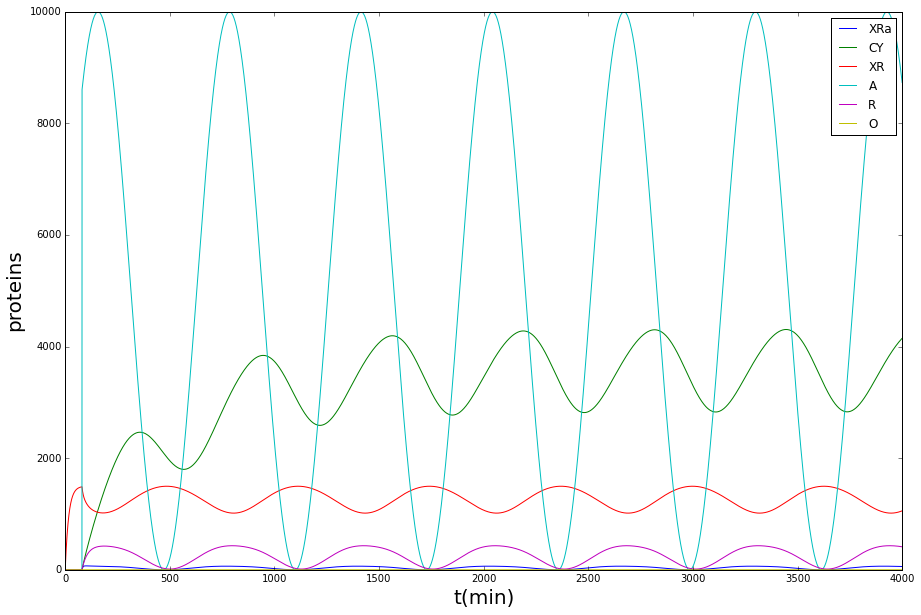

In [63]:
#Plot

plot(t,XRa,label='XRa')
plot(t,CY,label='CY')
plot(t,XR,label='XR')
plot(t,A,label='A')
plot(t,R,label='R')
plot(t,O,label='O')
plt.xlabel('t(min)',size=20)
plt.ylabel('proteins',size=20)
legend()
figure(figsize(15,10))
plt.savefig("Shewanelladet1.png", format='png',bbox_inches='tight',transparent=False)

# Shewy sin represor

A diferencia del modelo anterior, acá se plantea que la proteasa se produce de manera constante (gracias a un promotor constitutivo), por lo cual se eliminó el represor. La producción del citocromo(CY) ahora tiene un feedback positivo.

In [72]:
#First,we define the value of h,the corresponding range in x and the constants
#If you need more information about the parameters of our model please visit our Wiki. 

h=0.200 #step value

a=90.000   #important, adjusted value 
bXR=300.000 #No va 
kXR=3000.000 #typical value 
gXR=0.060 #real, checked 
dXRa=0.1998 #real, important not checked 
bX=300.000 #typical value 
nX=1.000 #Assumed ...why?
kx=1409.148 #not important 
kXRa=3000.000 #esto no va 
gXRa=0.0231 #not important not checked  


aX = 0.004691138 #real, basal checked, important
aR = 0.004691138 #basal Repressor production ---------non validated
gCY= 0.00071666667 #important checked, strange value 
gaCY = 0.01171666667 # Cytochrome protein (Active) degradation coupling ------ non validated
kc = 0.000001406334639 #real, important 
kR = 0.000001406334639 #repressor coupling rate ------ non validated
gO = 0.033 #ompT degradarion rate ------- non validated
gR = 0.033 #Repressor degration rate -------- non validated

#WTFWTFWTFWTFWTFWTFWTFWWTFWTF?!?!?!?!? -----> LEL
maxVal = 300 #deacuerdo a la grafica anterior para CY ------non validated---------MUUUUUST CHECK
hill = 150 #RANDOM VALUE. NO IDEA ------- VERY FLIPPING NON VALIDATED------------MUST CHECK
n = 1.0 #probemos con valores entre 0 y 1. ------non validated



n_points = int((4000.0+h)/h)
t = zeros(n_points)
XR = zeros(n_points) 
CY = zeros(n_points)  
A = zeros(n_points)
O = zeros(n_points) 
XRa = zeros(n_points) 
#A no cambia

In [73]:
#we define all the functions 
def func_XRa_prime(t,XRa,CY,XR,A):
    return kc*XR*A-(gXRa*XRa)-(dXRa*XRa)

def func_XR_prime(t,XRa,CY,XR,A):
    return a-(kc*A*kXR)-(gXR*XR)+(dXRa*XRa)

#modified + positive feedback
def func_CY_prime(t,XRa,CY,XR,A,O):
    return aX+(kc*A*XR)-(gCY*CY)-(gaCY*CY*O)+(maxVal**n)/(hill**n+CY**n)
#new
def func_O_prime(t,O):
    return aX-(gO*O)

In [76]:

#First we initialize the arrays
t[0] = 0.0
XRa[0] = 0.0
XR[0] = 0.0
CY[0] = 0.0
A[0] = 0.0
O[0] = 0.0 #new
#then we determine the input function
for i in range(400):
    A[i]=0.0
for i in range(401,n_points):
    A[i]=5000*sin(t[i]/100)+5000 #input senosoidal
    #A[i]=10000 #input funcion escalon
    
#And finally we do 4th order Runge Kutta. 
for i in range(1,n_points):
    
    k1_XRa = func_XRa_prime(t[i-1],XRa[i-1],CY[i-1],XR[i-1],A[i-1])
    k1_CY = func_CY_prime(t[i-1],XRa[i-1],CY[i-1],XR[i-1],A[i-1], O[i-1])
    k1_XR = func_XR_prime(t[i-1],XRa[i-1],CY[i-1],XR[i-1],A[i-1])
    k1_O = func_O_prime(t[i-1],O[i-1])
    
    
    #first step
    t1 = t[i-1] + (h/2.0)
    XRa1 = XRa[i-1] + (h/2.0) * k1_XRa
    CY1 = CY[i-1] + (h/2.0) * k1_CY
    XR1 = XR[i-1] + (h/2.0) * k1_XR
    O1 = O[i-1] + (h/2.0) * k1_O

    k2_XRa = func_XRa_prime(t1,XRa1,CY1,XR1,A[i-1])
    k2_CY = func_CY_prime(t1,XRa1,CY1,XR1,A[i-1], O1)
    k2_XR = func_XR_prime(t1,XRa1,CY1,XR1,A[i-1])
    k2_O = func_O_prime(t1, O1)
    
    
    #second step
    t2 = t[i-1] + (h/2.0)
    XRa2 = XRa[i-1] + (h/2.0) * k2_XRa
    CY2 = CY[i-1] + (h/2.0) * k2_CY
    XR2 = XR[i-1] + (h/2.0) * k2_XR
    O2 = O[i-1] + (h/2.0) * k2_O
     
    k3_XRa = func_XRa_prime(t2,XRa2,CY2,XR2,A[i-1])
    k3_CY = func_CY_prime(t2,XRa2,CY2,XR2,A[i-1],O2)
    k3_XR = func_XR_prime(t2,XRa2,CY2,XR2,A[i-1])
    k3_O = func_O_prime(t2, O2)
    
    
    #third step
    t3 = t[i-1] + h
    XRa3 = XRa[i-1] + (h/2.0) * k3_XRa
    CY3 = CY[i-1] + (h/2.0) * k3_CY
    XR3 = XR[i-1] + (h/2.0) * k3_XR
    O3 = O[i-1] + (h/2.0) * k3_O
    
    k4_XRa = func_XRa_prime(t3,XRa3,CY3,XR3,A[i-1])
    k4_CY = func_CY_prime(t3,XRa3,CY3,XR3,A[i-1],O3)
    k4_XR = func_XR_prime(t3,XRa3,CY3,XR3,A[i-1])
    k4_O = func_O_prime(t3, O3)
    
    
     #fourth step
    average_k_XRa = (1.0/6.0)*(k1_XRa + 2.0*k2_XRa + 2.0*k3_XRa + k4_XRa)
    average_k_CY = (1.0/6.0)*(k1_CY + 2.0*k2_CY + 2.0*k3_CY + k4_CY)
    average_k_XR = (1.0/6.0)*(k1_XR + 2.0*k2_XR + 2.0*k3_XR + k4_XR)
    average_k_O = (1.0/6.0)*(k1_O + 2.0*k2_O + 2.0*k3_O + k4_O)
    
    

    t[i] = t[i-1] + h
    XRa[i] = XRa[i-1] + h * average_k_XRa
    CY[i] = CY[i-1] + h * average_k_CY
    XR[i] = XR[i-1] + h * average_k_XR
    O[i] = O[i-1] + h * average_k_O
    #"""
    if (i < 400):
        A[i]=0.0
    if (401<i<n_points):
        A[i]=5000*sin(t[i]/100)+5000
    #"""


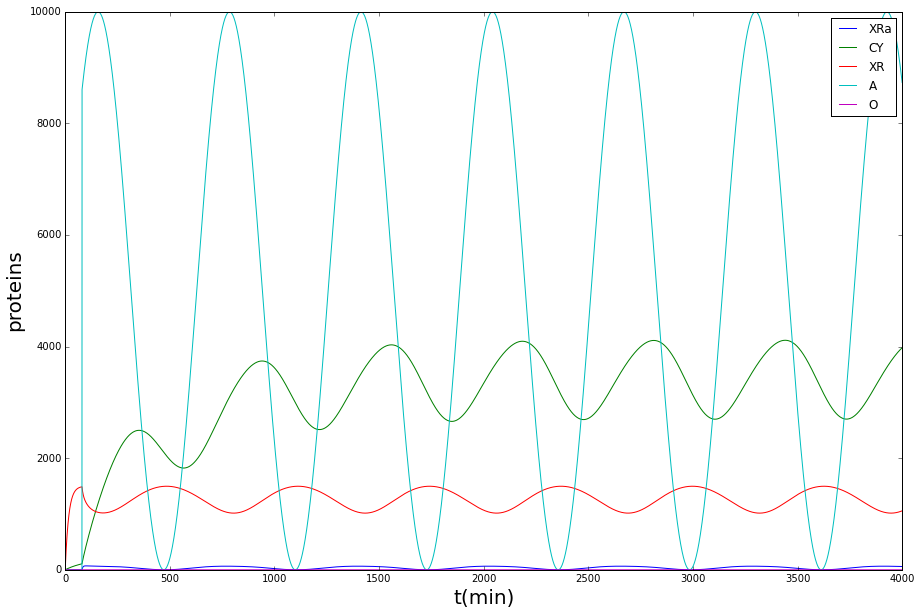

In [77]:
#Plot

plot(t,XRa,label='XRa')
plot(t,CY,label='CY')
plot(t,XR,label='XR')
plot(t,A,label='A')
plot(t,O,label='O')
plt.xlabel('t(min)',size=20)
plt.ylabel('proteins',size=20)
legend()
figure(figsize(15,10))
plt.savefig("Shewanelladet2.png", format='png',bbox_inches='tight',transparent=False)

### el feedback positivo no parece hacer mucha diferencia :/ (claro esta, con esas constantes que le puse). Queda a su libre albedría cambiarlas.... next step: constantes y el estocastico. Por lo menos pudimos hacer que la señal no crezca como "f(x)=sin(x)+x", ya es como un sin(x) normal :3